In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import seaborn as sns

Trafik akışının değişmesi kazaları nasıl etkiler?
Kaza oranlarını ne artırır?
Zaman içinde kaza oranlarını tahmin edebilir miyiz?
Kırsal ve kentsel alanlar nasıl farklılaştı?

In [2]:
data1=pd.read_csv('accidents_2005_to_2007.csv');data1.head()

/Users/esrabardakci/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (31) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002857,2005
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002840,2005
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002863,2005


In [3]:
data2=pd.read_csv('accidents_2009_to_2011.csv');data2.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,200901BS70001,524910,180800,-0.201349,51.512273,1,2,2,1,01/01/2009,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002882,2009
1,200901BS70002,525050,181040,-0.199248,51.514399,1,2,2,11,05/01/2009,...,Zebra crossing,Daylight: Street light present,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002886,2009
2,200901BS70003,526490,177990,-0.179599,51.486668,1,3,2,1,04/01/2009,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002912,2009
3,200901BS70004,524800,180300,-0.203110,51.507804,1,2,2,1,05/01/2009,...,Pedestrian phase at traffic signal junction,Daylight: Street light present,Other,Frost/Ice,None,None,1,Yes,E01002871,2009
4,200901BS70005,526930,177490,-0.173445,51.482076,1,2,2,1,06/01/2009,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002840,2009


In [4]:
data3=pd.read_csv('accidents_2012_to_2014.csv');data3.head()

/Users/esrabardakci/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (31) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,201201BS70001,527200,178760,-0.169101,51.493429,1,3,2,1,19/01/2012,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002821,2012
1,201201BS70002,524930,181430,-0.200838,51.517931,1,3,2,1,04/01/2012,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01004760,2012
2,201201BS70003,525860,178080,-0.188636,51.487618,1,3,2,1,10/01/2012,...,non-junction pedestrian crossing,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002893,2012
3,201201BS70004,524980,181030,-0.200259,51.514325,1,3,1,1,18/01/2012,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002886,2012
4,201201BS70005,526170,179200,-0.183773,51.497614,1,3,1,1,17/01/2012,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002890,2012


In [5]:
data1.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Year'],
      dtype='object')

Veri setlerini alt alta ekleyelim.

In [6]:
df = pd.concat([data1, data2, data3], ignore_index=True);df

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002857,2005
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002840,2005
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002863,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504145,2.01E+12,310037.0,597647.0,-3.417278,55.264773,98,2,2,1,07/12/2014,...,No physical crossing within 50 meters,Darkeness: No street lighting,Snowing without high winds,Snow,None,None,2,Yes,NaN,2014
1504146,2.01E+12,321509.0,574063.0,-3.230255,55.054855,98,3,2,2,11/12/2014,...,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Snow,None,None,2,Yes,NaN,2014
1504147,2.01E+12,321337.0,566365.0,-3.230826,54.985668,98,3,1,1,09/12/2014,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Frost/Ice,None,None,2,Yes,NaN,2014
1504148,2.01E+12,323869.0,566853.0,-3.191397,54.990446,98,2,3,2,17/12/2014,...,No physical crossing within 50 meters,Darkeness: No street lighting,Raining without high winds,Wet/Damp,None,None,2,Yes,NaN,2014


In [7]:
df.duplicated().sum() #duplike olmuş 34155 adet satırımız var. Temizleyelim.

34155

In [8]:
df=df.drop_duplicates()

In [9]:
len(df)

1469995

Bazı kolonlarda yüksek miktarda bazılarında ise tölere edilebilir miktarda eksik veri olduğu görülüyor. Junction_Detail kolonunda hiç veri bulunmadığını da görüyoruz.

In [10]:
df.isna().sum() #bazı kolonlarda yüksek miktarda eksik veri var

Accident_Index                                       0
Location_Easting_OSGR                              101
Location_Northing_OSGR                             101
Longitude                                          101
Latitude                                           101
Police_Force                                         0
Accident_Severity                                    0
Number_of_Vehicles                                   0
Number_of_Casualties                                 0
Date                                                 0
Day_of_Week                                          0
Time                                               117
Local_Authority_(District)                           0
Local_Authority_(Highway)                            0
1st_Road_Class                                       0
1st_Road_Number                                      0
Road_Type                                            0
Speed_limit                                          0
Junction_D

Öncelikle 'Junction_Detail', 'Junction_Control','LSOA_of_Accident_Location' kolonlarını dataframeden silelim. Kullanmayacağız.

In [11]:
df = df.drop(columns=['Junction_Detail', 'Junction_Control','LSOA_of_Accident_Location'], axis=1) 

'Weather_Conditions' ve 'Did_Police_Officer_Attend_Scene_of_Accident' kategorik verileri Unknown olarak dolduralım.

In [12]:
df['Weather_Conditions'].fillna('Unknown', inplace=True) 

In [13]:
df['Did_Police_Officer_Attend_Scene_of_Accident'].fillna('Unknown', inplace=True)

Tölere edilebilir miktarda eksik veri bulunan ve analiz için kullanabileceğim kolonların eksik veri satırlarını silelim.

In [14]:
# Eksik veri temizliği için seçilen kolonlar
cols_to_check = [
    'Road_Surface_Conditions',
    'Pedestrian_Crossing-Physical_Facilities',
    'Pedestrian_Crossing-Human_Control',
    'Time',
    'Location_Easting_OSGR',
    'Location_Northing_OSGR',
    'Longitude',
    'Latitude',
    'Special_Conditions_at_Site',
    'Carriageway_Hazards'
]

# Bu kolonlarda eksik olan satırları çıkar
df = df.dropna(subset=cols_to_check).reset_index(drop=True)

Trafik akışının değişmesi kazaları nasıl etkiler? sorusuna cevap arayalım.

In [15]:
df.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       '2nd_Road_Class', '2nd_Road_Number',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'Year'],
      dtype='object')

In [16]:
# Time kolonundaki eksikler zaten temizlenmişti
# Saat bilgisini ayıklıyoruz
df['Hour'] = df['Time'].str[:2].astype(int)

In [17]:
def map_time_period(hour):
    if 0 <= hour < 6:
        return 'Gece'
    elif 6 <= hour < 12:
        return 'Sabah'
    elif 12 <= hour < 18:
        return 'Öğleden Sonra'
    else:
        return 'Akşam'

df['Time_Period'] = df['Hour'].apply(map_time_period)

Saat dilimlerine göre toplam kaza sayısını görselleştirelim

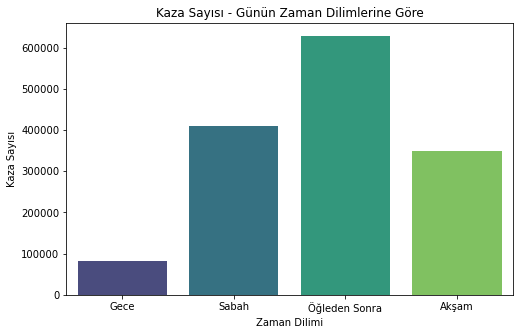

In [18]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Time_Period', order=['Gece', 'Sabah', 'Öğleden Sonra', 'Akşam'], palette='viridis')
plt.title('Kaza Sayısı - Günün Zaman Dilimlerine Göre')
plt.xlabel('Zaman Dilimi')
plt.ylabel('Kaza Sayısı')
plt.show()

Kaza Şiddeti (Accident_Severity) vs Saat
Kaza şiddeti 1 (en ciddi), 2 (orta), 3 (hafif) olacak şekilde kodlanmışsa, bunu da saat dilimlerine göre inceleyebiliriz:

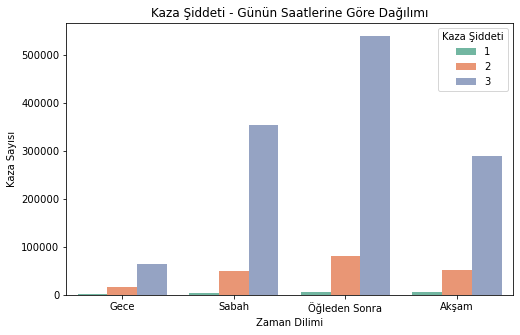

In [19]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Time_Period', hue='Accident_Severity', order=['Gece', 'Sabah', 'Öğleden Sonra', 'Akşam'], palette='Set2')
plt.title('Kaza Şiddeti - Günün Saatlerine Göre Dağılımı')
plt.xlabel('Zaman Dilimi')
plt.ylabel('Kaza Sayısı')
plt.legend(title='Kaza Şiddeti')
plt.show()

Araç Sayısı ile Zaman İlişkisi
Çok araçlı kazalar belli saatlerde artıyor mu?

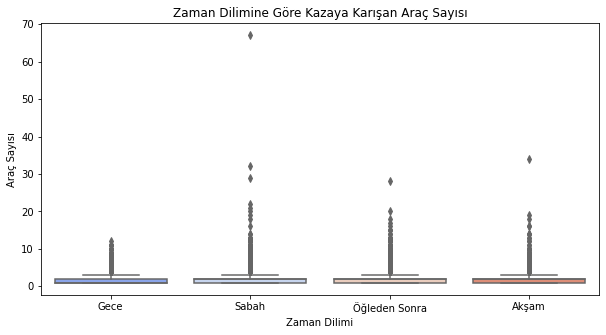

In [20]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Time_Period', y='Number_of_Vehicles', order=['Gece', 'Sabah', 'Öğleden Sonra', 'Akşam'], palette='coolwarm')
plt.title('Zaman Dilimine Göre Kazaya Karışan Araç Sayısı')
plt.xlabel('Zaman Dilimi')
plt.ylabel('Araç Sayısı')
plt.show()

yukarıdaki grafikte outlierlar kaynaklı çıktılar net değil. Outlierları dışarda bırakıp değerlendirelim.

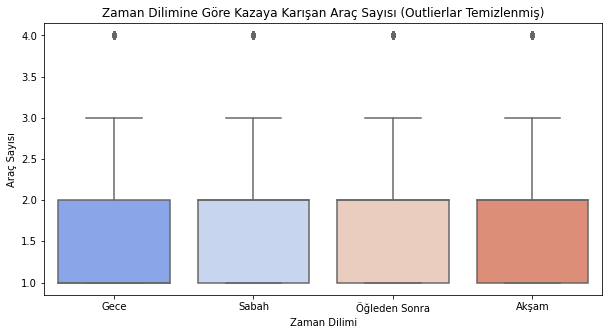

In [21]:
threshold = df['Number_of_Vehicles'].quantile(0.99)
df_filtered = df[df['Number_of_Vehicles'] <= threshold]

plt.figure(figsize=(10, 5))
sns.boxplot(data=df_filtered, x='Time_Period', y='Number_of_Vehicles', order=['Gece', 'Sabah', 'Öğleden Sonra', 'Akşam'], palette='coolwarm')
plt.title('Zaman Dilimine Göre Kazaya Karışan Araç Sayısı (Outlierlar Temizlenmiş)')
plt.xlabel('Zaman Dilimi')
plt.ylabel('Araç Sayısı')
plt.show()

Görsel Yorum (Outlier'sız)
✅ Gözlenenler:
Tüm zaman dilimlerinde medyan araç sayısı tam olarak aynı: 2.

IQR (box yüksekliği) de oldukça benzer. Yani 25% ile 75% dilim arasındaki araç sayısı her zaman diliminde 1 ile 2 arasında.

Maksimum değerler (whisker üstü) genelde 3, bazı az sayıda 4’lük outlier kalmış.

Sabah, öğleden sonra, akşam ve gece saatlerinde kazaya karışan araç sayısında ciddi bir farklılık yok.

🔎 Ne çıkarabiliriz?
Trafik akışının saatlik değişimi, kazaya karışan araç sayısında anlamlı bir fark yaratmamış gibi görünüyor.

Bu, şunu gösterebilir:

Günün her saatinde meydana gelen kazalar genellikle 2 araç arasında oluyor.

Zincirleme kazalar (çok araçlı kazalar) nadiren oluyor ve tüm zaman dilimlerinde benzer oranlarda.

hem kaza sayısının hem de kaza şiddetinin öğleden sonra arttığını gözlemlediysen, bu çok önemli bir içgörü. Şimdi birlikte bunu veriye dayanarak daha net ifade edelim ve birkaç yorum + öneriyle ilerleyelim:

Text(0.5, 1.0, 'Kaza Şiddeti - Günün Zaman Dilimlerine Göre')

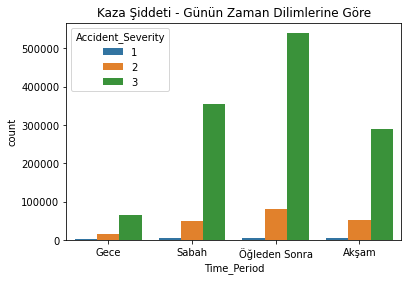

In [22]:
sns.countplot(data=df, x='Time_Period', hue='Accident_Severity', order=['Gece', 'Sabah', 'Öğleden Sonra', 'Akşam'])
plt.title("Kaza Şiddeti - Günün Zaman Dilimlerine Göre")

📌 Olası Nedenler (Veriyle Bağlantılı Yorumlar)
Neden öğleden sonra daha çok ve ciddi kaza oluyor olabilir?
Trafik yoğunluğu:
İş çıkış saatleri (16:00–18:00) bu döneme denk gelir. Daha çok araç trafikte → daha çok etkileşim → daha fazla kaza.

Yorgunluk/algı azalması:
Gün ortasında dikkat dağınıklığı ve yorgunluk artabilir.

Işık koşulları değişimi:
Kış aylarında öğleden sonra hava kararmaya başlar → görsel algı düşer.

Okul çıkışı / servis saatleri:
Öğrenci taşımacılığı trafiği artırır.

In [23]:
#Öğleden sonra saat aralığını detaylandır:

df[df['Time_Period'] == 'Öğleden Sonra']['Hour'].value_counts().sort_index()

12     87051
13     89178
14     89046
15    113316
16    119168
17    130351
Name: Hour, dtype: int64

✅ 1. Saat 15:00’ten sonra ciddi artış başlıyor.
14:00 → 89 bin

15:00 → 113 bin
→ %27 artış!

✅ 2. En çok kaza 17:00’de oluyor.
Bu, açık şekilde iş çıkış saati etkisini gösteriyor.

Öğrenci ve servis trafiği de buna katkı sağlar.

✅ 3. Yoğunlukla birlikte risk artıyor.
Daha fazla araç = daha fazla etkileşim

Belki yorgunluk, dikkatsizlik, acelecilik bu saatlerde pik yapıyor.



--------------------------------------------

Kaza oranlarını ne artırır?

In [31]:
df['Accident_Severity'].value_counts(normalize=True) *100

3    85.167999
2    13.535757
1     1.296244
Name: Accident_Severity, dtype: float64

In [35]:
pd.crosstab(df['Speed_limit'], df['Accident_Severity'], normalize='columns') * 100

Accident_Severity,1,2,3
Speed_limit,,,
10,0.010512,0.001007,0.000800
15,0.000000,0.000000,0.000800
20,0.499317,1.177803,1.118970
30,32.954904,58.643010,65.488554
40,9.239987,8.188750,8.166610
50,5.397877,3.542972,3.177802
60,38.746978,21.978105,14.677964
70,13.150426,6.468353,7.368500


Ciddi kazalar oransal olarak en çok 60 mph hızda meydana geliyor. Toplam hafif ve orta kazaların büyük çoğunluğu ise 30 mph gibi şehir içi hızlarda gerçekleşiyor. Bu da şehir içi kazaların daha sık ama daha az tehlikeli olduğunu gösteriyor.

In [36]:
pd.crosstab(df['Weather_Conditions'], df['Accident_Severity'], normalize='columns') * 100

Accident_Severity,1,2,3
Weather_Conditions,,,
Fine with high winds,1.750237,1.334340,1.208405
Fine without high winds,83.086303,82.612307,79.689027
Fog or mist,0.904026,0.569775,0.539486
Other,1.524230,1.800931,2.318015
Raining with high winds,1.445391,1.357493,1.390553
Raining without high winds,9.544833,10.435133,12.027409
Snowing with high winds,0.068328,0.111740,0.135752
Snowing without high winds,0.467781,0.534541,0.798990
Unknown,1.208872,1.243740,1.892362


🧠 Yorumlar:
✅ 1. En çok kaza açık havada oluyor
Tüm ciddi kazaların %83'ü → “Fine without high winds”

Ancak bu, bu havanın tehlikeli olduğu anlamına gelmez!

Çünkü çoğu trafik o havada yapılıyor → maruziyet yüksek

Yağmurlu havada sürüş oranı çok daha az → buna rağmen %10+ ciddi kaza → bu koşullarda risk daha yüksek



In [37]:
pd.crosstab(df['Weather_Conditions'], df['Accident_Severity'], normalize='index') * 100

Accident_Severity,1,2,3
Weather_Conditions,,,
Fine with high winds,1.840796,14.654505,83.504699
Fine without high winds,1.344089,13.955292,84.700620
Fog or mist,2.137177,14.065606,83.797217
Other,0.882935,10.893591,88.223474
Raining with high winds,1.351019,13.249816,85.399165
Raining without high winds,1.050318,11.990746,86.958936
Snowing with high winds,0.672878,11.490683,87.836439
Snowing without high winds,0.798995,9.534069,89.666936
Unknown,0.872633,9.375119,89.752248


Sis ve mistik hava koşulları, kazaların daha ciddi olma ihtimalini artırıyor.

Rüzgar etkisi de kaza şiddetinde artış yaratıyor, ancak açık havadan çok daha az yaygın.

Kar yağışı ve diğer aşırı koşullar, sürücülerin temkinli davranması nedeniyle daha az ciddi kaza ile sonuçlanıyor olabilir.

Genelde en çok kaza açık havada (%80+ hafif), ama kaza şiddeti açısından sis + rüzgar gibi koşullar daha riskli.

In [39]:
# Özellik listesi
features = [
    'Speed_limit',
    'Weather_Conditions',
    'Light_Conditions',
    'Road_Surface_Conditions',
    'Urban_or_Rural_Area',
    'Pedestrian_Crossing-Physical_Facilities',
    'Pedestrian_Crossing-Human_Control'
]

# Her özellik için normalize='index' ve normalize='columns' tabloları
for feature in features:
    print(f"\n\n=== {feature} - normalize='index' ===")
    print(pd.crosstab(df[feature], df['Accident_Severity'], normalize='index') * 100)

    print(f"\n\n=== {feature} - normalize='columns' ===")
    print(pd.crosstab(df[feature], df['Accident_Severity'], normalize='columns') * 100)



=== Speed_limit - normalize='index' ===
Accident_Severity          1          2           3
Speed_limit                                        
10                 14.285714  14.285714   71.428571
15                  0.000000   0.000000  100.000000
20                  0.578457  14.248310   85.173233
30                  0.666003  12.375656   86.958341
40                  1.463585  13.544407   84.992008
50                  2.148940  14.728715   83.122345
60                  3.143402  18.618643   78.237955
70                  2.328200  11.958312   85.713488


=== Speed_limit - normalize='columns' ===
Accident_Severity          1          2          3
Speed_limit                                       
10                  0.010512   0.001007   0.000800
15                  0.000000   0.000000   0.000800
20                  0.499317   1.177803   1.118970
30                 32.954904  58.643010  65.488554
40                  9.239987   8.188750   8.166610
50                  5.397877   3.5429

1. Speed_limit
normalize='index': Hız arttıkça ciddi kaza oranı artıyor, 60 mph %3.14 ile en yüksek ciddi kaza oranı

normalize='columns': Ciddi kazaların %38.7’si 60 mph’de, %33’ü 30 mph’de gerçekleşmiş

Yorum: Orta-yüksek hızlarda ciddi kaza riski artıyor. 30 mph’de ise hafif ve orta kazalar çok.

2. Weather_Conditions
normalize='index': Kötü hava koşullarında (örneğin “Fog or mist”) ciddi kaza oranı %2.1, açık havada %1.3-1.8 civarı

normalize='columns': Tüm ciddi kazaların %83’ü “Fine without high winds” yani açık havada ama maruziyet yüksek

Yorum: Kötü hava az ama orantısal olarak daha tehlikeli. Açık hava koşullarında ise kazalar daha sık ama oransal olarak daha az ciddi.

3. Light_Conditions
normalize='index': "Darkeness: No street lighting" ciddi kaza oranı %4.3 ile en yüksek

normalize='columns': Ciddi kazaların %18.7’si bu koşulda olmuş

Yorum: Sokak lambası olmayan karanlık yerlerde kaza riski ve ciddiyeti artıyor.

4. Road_Surface_Conditions
normalize='index': En yüksek ciddi kaza oranı “Flood (Over 3cm of water)” ile %1.98

normalize='columns': Kazaların çoğu “Dry” yani kuru zeminde (%67 ciddi kazalar dahil)

Yorum: Kötü yol koşulları az fakat ciddi kazalara neden oluyor; kuru zeminde ise kazalar daha sık.

5. Urban_or_Rural_Area
normalize='index': Kırsal alan (2) ciddi kaza oranı %2.35 ile şehir merkezine göre yüksek (1’de %0.7)

normalize='columns': Ciddi kazaların %64.7’si kırsal alanda, %35.2’si şehirde gerçekleşmiş

Yorum: Kırsal alanlarda kaza şiddeti daha yüksek, şehirde ise kaza sayısı fazla ama daha hafif sonuçlu.

6. Pedestrian_Crossing-Physical_Facilities
normalize='index': Ciddi kaza oranları tüm crossing tiplerinde yaklaşık %0.6-1.7 arası, en yüksek “Footbridge or subway”

normalize='columns': Ciddi kazaların %89’u “No physical crossing within 50 meters” bölgesinde

Yorum: Yaya geçidinin olmadığı bölgelerde ciddi kaza oranı yüksek, yaya geçitleri risk azaltıcı.

7. Pedestrian_Crossing-Human_Control
normalize='index': “None within 50 metres” olan yerlerde ciddi kaza oranı %1.3, diğer kontrollü alanlarda daha düşük

normalize='columns': Ciddi kazaların %99.7’si kontrolsüz bölgelerde gerçekleşmiş

Yorum: Yaya geçidinde insan kontrolü olmaması ciddi kazaları artırıyor.

Sonuç Önerisi:
En kritik risk faktörleri:

Yüksek hız (özellikle 50-60 mph arası)

Kötü hava ve görüş koşulları (sis, karanlık, yağmur)

Kırsal alanlarda kazaların daha ciddi olması

Yaya geçidi eksikliği ve kontrolsüz yaya bölgeleri

Karar vericiye öneri:

Hız kontrolü ve hız limiti düzenlemeleri

Kötü hava koşullarında sürücü bilgilendirmesi ve uyarılar

Kırsal yolların güvenlik iyileştirilmesi

Yaya geçidi ve kontrol sistemlerinin artırılması



Kırsal ve Kentsel alanlar nasıl farklılaştı?

In [41]:
# Urban_or_Rural_Area için normalize='index' (satır bazlı)
print("=== Urban_or_Rural_Area - normalize='index' ===")
print(pd.crosstab(df['Urban_or_Rural_Area'], df['Accident_Severity'], normalize='index') * 100)

print("\n=== Urban_or_Rural_Area - normalize='columns' ===")
# Urban_or_Rural_Area için normalize='columns' (sütun bazlı)
print(pd.crosstab(df['Urban_or_Rural_Area'], df['Accident_Severity'], normalize='columns') * 100)

=== Urban_or_Rural_Area - normalize='index' ===
Accident_Severity           1          2          3
Urban_or_Rural_Area                                
1                    0.709869  12.210822  87.079310
2                    2.354474  15.927000  81.718525
3                    0.000000   8.571429  91.428571

=== Urban_or_Rural_Area - normalize='columns' ===
Accident_Severity            1          2          3
Urban_or_Rural_Area                                 
1                    35.235993  58.044042  65.786055
2                    64.764007  41.954448  34.211385
3                     0.000000   0.001510   0.002560


Sonuç
Yarı kırsal alanlar ciddi kaza açısından en riskli bölgeler.

Kentsel alanlarda kaza sayısı fazla, ancak genellikle hafif seyrediyor.

Kırsal alanlarda kaza sayısı ve ciddi kaza oranı düşük (ancak veri sayısı da düşük olabilir).



In [42]:
def plot_crosstab_comparison(df, feature, target='Accident_Severity', figsize=(14,6)):
    """
    df: veri çerçevesi
    feature: kategorik özellik adı (string)
    target: hedef kolon (default 'Accident_Severity')
    figsize: grafik boyutu
    """
    # normalize index ve columns crosstab
    ct_index = pd.crosstab(df[feature], df[target], normalize='index') * 100
    ct_columns = pd.crosstab(df[feature], df[target], normalize='columns') * 100
    
    # Plot
    fig, axs = plt.subplots(1, 2, figsize=figsize)
    
    ct_index.plot(kind='bar', stacked=True, ax=axs[0], colormap='Set2')
    axs[0].set_title(f"{feature} - normalize='index'\nHer {feature} için kaza şiddeti dağılımı (%)")
    axs[0].set_ylabel('Yüzde')
    axs[0].set_xlabel(feature)
    axs[0].legend(title='Kaza Şiddeti')
    
    ct_columns.plot(kind='bar', stacked=True, ax=axs[1], colormap='Set3')
    axs[1].set_title(f"{feature} - normalize='columns'\nHer kaza şiddeti için {feature} dağılımı (%)")
    axs[1].set_ylabel('Yüzde')
    axs[1].set_xlabel(feature)
    axs[1].legend(title='Kaza Şiddeti')
    
    plt.tight_layout()
    plt.show()

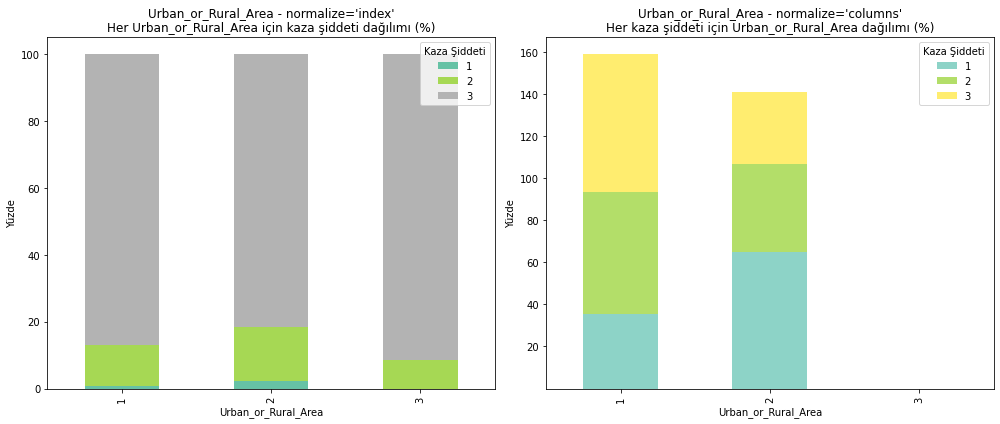

In [43]:
plot_crosstab_comparison(df, 'Urban_or_Rural_Area')

--------

In [59]:
df.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       '2nd_Road_Class', '2nd_Road_Number',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'Year', 'Hour', 'Time_Period', 'Severe', 'Month'],
      dtype='object')

Zaman içinde kaza oranlarını tahmin edebilir miyiz?

In [48]:
# Tarih formatını düzeltelim
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Haftalık toplam kaza sayısını alalım
weekly_counts = df.resample('W', on='Date').size()

In [50]:
weekly_counts

Date
2005-01-02     612
2005-01-09    3139
2005-01-16    3861
2005-01-23    4140
2005-01-30    3925
              ... 
2014-12-07    3069
2014-12-14    3268
2014-12-21    2930
2014-12-28    1969
2015-01-04     785
Freq: W-SUN, Length: 523, dtype: int64

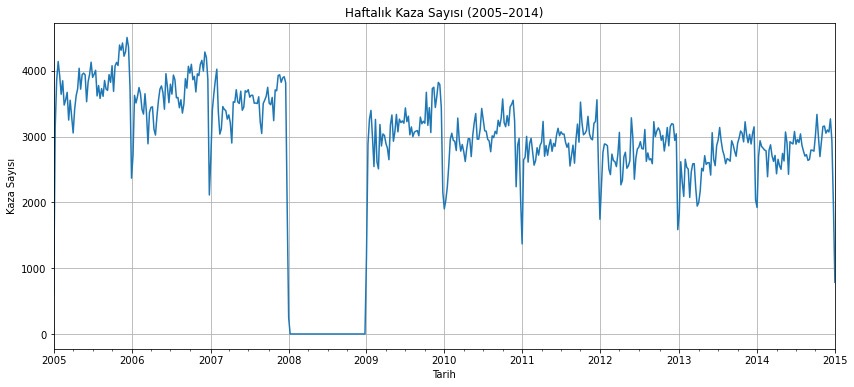

In [51]:
plt.figure(figsize=(14,6))
weekly_counts.plot()
plt.title('Haftalık Kaza Sayısı (2005–2014)')
plt.xlabel('Tarih')
plt.ylabel('Kaza Sayısı')
plt.grid(True)
plt.show()

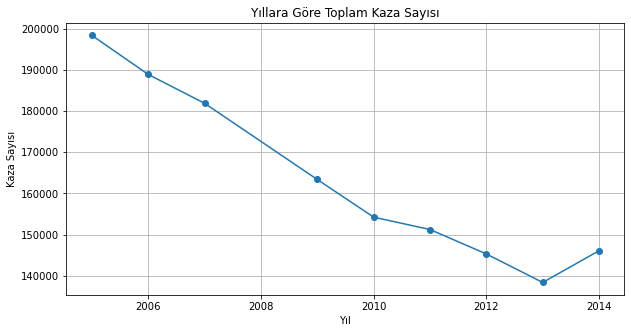

In [52]:
# Yıllık toplam kaza sayısı
yearly = df.groupby('Year').size()

# Çizgi grafik
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(yearly.index, yearly.values, marker='o')
plt.title("Yıllara Göre Toplam Kaza Sayısı")
plt.xlabel("Yıl")
plt.ylabel("Kaza Sayısı")
plt.grid(True)
plt.show()


Normalde yıllar içinde kaza oranlarında bir düşüş varken 2013 sonrasında ani bir yükeliş yaşanmış.

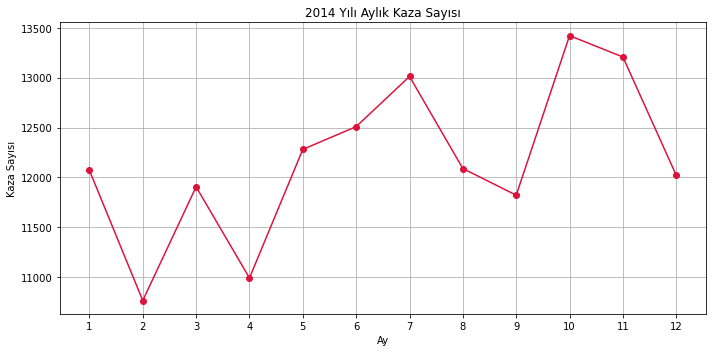

In [54]:
# 2014 verisini filtrele
df_2014 = df[df['Year'] == 2014].copy()

# Ay kolonu oluştur
df_2014['Month'] = df_2014['Date'].dt.month

# Aylık kaza sayısı
monthly_counts = df_2014['Month'].value_counts().sort_index()

# Görselleştirme
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(monthly_counts.index, monthly_counts.values, marker='o', color='crimson')
plt.title('2014 Yılı Aylık Kaza Sayısı')
plt.xlabel('Ay')
plt.ylabel('Kaza Sayısı')
plt.xticks(range(1, 13))
plt.grid(True)
plt.tight_layout()
plt.show()


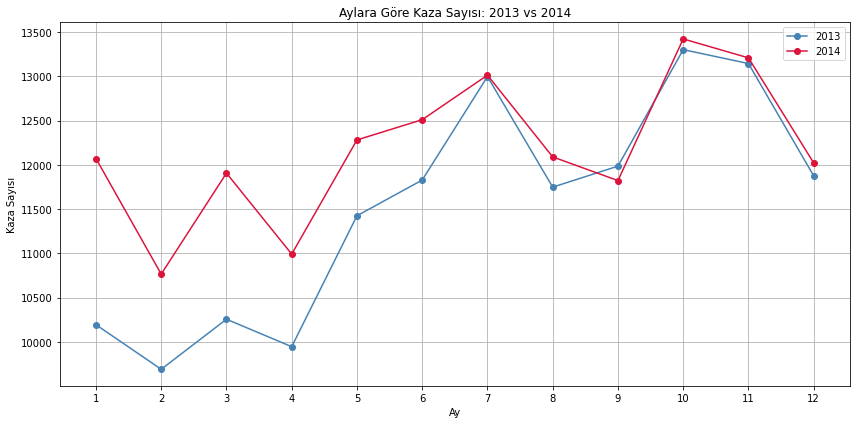

In [55]:

# 2013 ve 2014 için filtreleme
df_2013 = df[df['Year'] == 2013].copy()
df_2014 = df[df['Year'] == 2014].copy()

# Ay kolonunu çıkar
df_2013['Month'] = df_2013['Date'].dt.month
df_2014['Month'] = df_2014['Date'].dt.month

# Aylık kaza sayılarını al
monthly_2013 = df_2013['Month'].value_counts().sort_index()
monthly_2014 = df_2014['Month'].value_counts().sort_index()

# Grafik çizimi
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(monthly_2013.index, monthly_2013.values, marker='o', label='2013', color='steelblue')
plt.plot(monthly_2014.index, monthly_2014.values, marker='o', label='2014', color='crimson')

plt.title('Aylara Göre Kaza Sayısı: 2013 vs 2014')
plt.xlabel('Ay')
plt.ylabel('Kaza Sayısı')
plt.xticks(range(1, 13))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

📈 2013 vs 2014 Aylık Kaza Sayıları Karşılaştırması – Yorum
📌 Genel Desen:
Her iki yılda da benzer bir mevsimsel desen var:

Kazalar ilkbahardan yaza doğru artıyor.

7. ay (Temmuz) her iki yılda da zirve noktası.

Ardından sonbahar ve kışa doğru düşüş yaşanıyor.

📌 Farklılaşan Noktalar:
2014 yılı, 2013’ün aynı desenini izliyor ama tüm değerler daha yüksek:

Özellikle Ocak–Haziran arası fark bariz.

Bu, sistematik bir artışı veya 2014'e özel bazı dışsal faktörleri (hava, yasa, trafik yoğunluğu, altyapı çalışmaları vs.) işaret ediyor olabilir.

7. ayda kesişme ilginç: Bu ay tavan nokta ama artış farkı kapanıyor.

Bu, yaz aylarında alınan geçici önlemlerin (örneğin tatil sezonu trafik kontrolleri) etkisi olabilir.

In [56]:
# Ay ve yıl kolonlarını çıkartalım
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Month'] = df['Date'].dt.month

# 2013 ve 2014, ilk 6 ay (Ocak-Haziran) filtresi
df_13_14 = df[(df['Year'].isin([2013, 2014])) & (df['Month'] <= 6)]

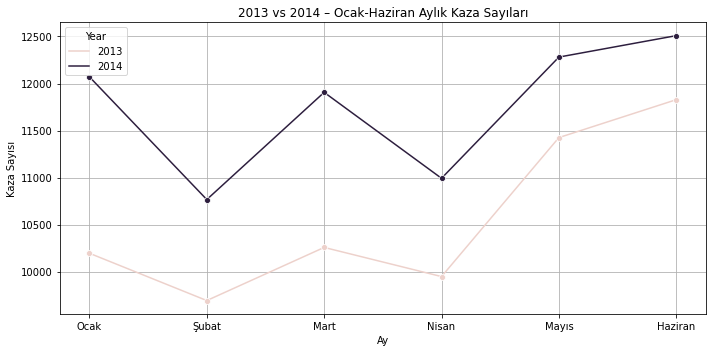

In [57]:
# Aylık kaza sayısını grup olarak hesapla
monthly_counts = df_13_14.groupby(['Year', 'Month']).size().reset_index(name='Accident_Count')

# Grafik
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_counts, x='Month', y='Accident_Count', hue='Year', marker='o')
plt.title('2013 vs 2014 – Ocak-Haziran Aylık Kaza Sayıları')
plt.xlabel('Ay')
plt.ylabel('Kaza Sayısı')
plt.xticks(ticks=range(1, 7), labels=['Ocak', 'Şubat', 'Mart', 'Nisan', 'Mayıs', 'Haziran'])
plt.grid(True)
plt.tight_layout()
plt.show()